<a href="https://colab.research.google.com/github/mehdi-abbasi/CrowdEstimation/blob/main/CrowdEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 21.8 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="sNlXIW3xuyZYcsjTLJcF")
project = rf.workspace("crowd-dataset").project("crowd-counting-dataset-w3o7w")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crowd-counting-dataset-2 in yolov11:: 100%|██████████| 5808/5808 [00:02<00:00, 2324.23it/s]


In [ ]:
!ls

best.pt  crowd-counting-dataset-2  sample_data


In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLO model
# model = YOLO('yolo11s.pt')  # Use a different variant if needed (e.g., yolov8s.pt, yolov8m.pt)
model = YOLO('best.pt')  # Use a different variant if needed (e.g., yolov8s.pt, yolov8m.pt)


In [ ]:
# Evaluate the pre-trained model on the validation set
metrics = model.val(data='/content/crowd-counting-dataset-2/data.yaml', imgsz=640, batch=16, device='cpu')  # Adjust as needed

# Print evaluation metrics
print(metrics)


Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 3.37MB/s]
val: Scanning /content/crowd-counting-dataset-2/valid/labels... 382 images, 0 backgrounds, 0 corrupt: 100%|██████████| 382/382 [00:00<00:00, 535.33it/s]

val: WARNING ⚠️ /content/crowd-counting-dataset-2/valid/images/img_469_jpg.rf.87be649110fdc80877fc1879d7d01b4d.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/crowd-counting-dataset-2/valid/images/img_472_jpg.rf.2128d7d4ef7d8f175d20c97f46ba9d2c.jpg: 3 duplicate labels removed
val: New cache created: /content/crowd-counting-dataset-2/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [05:13<00:00, 13.07s/it]


                   all        382      73732     0.0192    0.00684    0.00965      0.003
                person        382      73732     0.0192    0.00684    0.00965      0.003
Speed: 7.6ms preprocess, 801.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f82b672ff70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.02602

In [ ]:
metrics = model.train(data='/content/crowd-counting-dataset-2/data.yaml', imgsz=640, batch=8, device=0)  # Adjust as needed


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=best.pt, data=/content/crowd-counting-dataset-2/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]


KeyboardInterrupt: 

In [ ]:
results = model.predict("/content/crowd-counting-dataset-2/test/images", save=False, conf=0.1,classes=[0])
# results = model.predict("/content/smaple", save=True, conf=0.1,classes=[0])
predicted = []
for result in results:
  predicted.append(result.boxes.cls.__len__())


image 1/2 /content/smaple/01.jpg: 640x448 177 peoples, 12.8ms
image 2/2 /content/smaple/02.jpg: 384x640 300 peoples, 12.0ms
Speed: 2.5ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


In [ ]:
# prompt: load text files from a directory and append the number of lines in each file into a list

import os

def count_lines_in_directory(directory):
  """Loads text files from a directory and appends the number of lines in each file to a list.

  Args:
    directory: The path to the directory containing the text files.

  Returns:
    A list of integers, where each integer represents the number of lines in a text file.
    Returns an empty list if the directory does not exist or if no text files are found.
  """

  line_counts = []
  lines_dict = {}
  if not os.path.isdir(directory):
    print(f"Error: Directory '{directory}' not found.")
    return line_counts

  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      filepath = os.path.join(directory, filename)
      try:
          with open(filepath, 'r') as f:
              lines = f.readlines()
              line_counts.append((filename,len(lines)))
              lines_dict[filename] = len(lines)
      except Exception as e:
          print(f"Error reading file '{filename}': {e}")

  return line_counts,lines_dict


# Example usage: replace 'your_directory' with the actual path
directory_path = "/content/crowd-counting-dataset-2/test/labels"
line_counts_list, lines_dict = count_lines_in_directory(directory_path)
len(line_counts_list)

231

In [ ]:
labels = sorted(line_counts_list)
labels = [x[1] for x in labels]

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(labels,predicted)

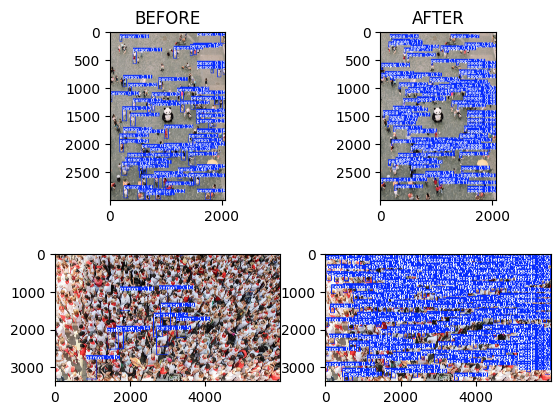

In [ ]:
import matplotlib.pyplot as plt
sp1_b = plt.imread('/content/runs/detect/predict/01.jpg')
sp2_b = plt.imread('/content/runs/detect/predict/02.jpg')
sp1_a = plt.imread('/content/runs/detect/predict2/01.jpg')
sp2_a = plt.imread('/content/runs/detect/predict2/02.jpg')
plt.subplot(2,2,1)
plt.title('BEFORE')
plt.imshow(sp1_b)
plt.subplot(2,2,2)
plt.title('AFTER')
plt.imshow(sp1_a)
plt.subplot(2,2,3)
plt.imshow(sp2_b)
plt.subplot(2,2,4)
plt.imshow(sp2_a)